The dataset cantains 20 house features plus the price, along with 21613 observations.

The description for the 20 features is given below:

1. id : It is the unique numeric number assigned to each house being sold.
2. date : It is the date on which the house was sold out.
3. price: It is the price of house which we have to predict so this is our target variable and aprat from it are our features.
4. bedrooms : It determines number of bedrooms in a house.
5. bathrooms : It determines number of bathrooms in a bedroom of a house.
6. sqft_living : It is the measurement variable which determines the measurement of house in square foot.
7. sqft_lot : It is also the measurement variable which determines square foot of the lot.
8. floors: It determines total floors means levels of house.
9. waterfront : This feature determines whether a house has a view to waterfront 0 means no 1 means yes.
10. view : This feature determines whether a house has been viewed or not 0 means no 1 means yes.
11. condition : It determines the overall condition of a house on a scale of 1 to 5.
12. grade : It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11.
13. sqft_above : It determines square footage of house apart from basement.
14. sqft_basement : It determines square footage of the basement of the house.
15. yr_built : It detrmines the date of building of the house.
16. yr_renovated : It detrmines year of renovation of house.
17. zipcode : It determines the zipcode of the location of the house.
18. lat : It determines the latitude of the location of the house.
19. long : It determines the longitude of the location of the house.
20. sqft_living15 : Living room area in 2015(implies-- some renovations)
21. sqft_lot15 : lotSize area in 2015(implies-- some renovations)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 

In [2]:

df = pd.read_csv("kc_house_data.csv")

In [3]:
df["date"] = pd.to_datetime(df["date"])

In [4]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
# Check any number of columns with NaN or missing values 
print(df.isnull().any().sum(), ' / ', len(df.columns))
# Check any number of data points with NaN
print(df.isnull().any(axis=1).sum(), ' / ', len(df))

0  /  21
0  /  21613


# Finding Correlation

In this step we check by finding correlation of all the features wrt target variable i.e., price to see whether they are positively correlated or negatively correlated to find if they help in prediction process in model building process or not.

In [9]:
df_corr = df.drop(['id', 'date', 'bedrooms', 'bathrooms', 'floors', 'view',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long'], axis=1, inplace=False)

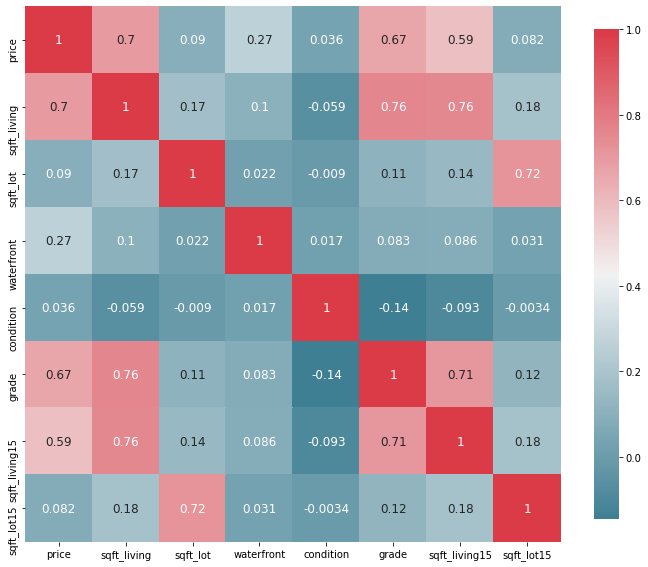

In [10]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

plot_correlation_map(df_corr)

# Feature Selection

The non-linear features selected:

*   sqft_lot
*   yr_built

_________________________
The linear features selected:

* sqft_living
* sqft_above
* grade


In [11]:
boston_df = pd.read_csv("kc_house_data.csv")

In [12]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(boston_df, test_size=0.2, random_state=42)

boston_df.sort_values("sqft_living", inplace=True)
train_df.sort_values("sqft_living", inplace=True)
test_df.sort_values("sqft_living", inplace=True)

x_linear_regression = boston_df["sqft_living"].values.reshape(-1,1)
x_linear_regression_training = train_df["sqft_living"].values.reshape(-1,1)
x_linear_regression_testing = test_df["sqft_living"].values.reshape(-1,1)

x_multilinear_regression = boston_df[ ["sqft_living", "sqft_above", "grade"] ]
x_multilinear_regression_training = train_df[ ["sqft_living", "sqft_above", "grade"] ].values
x_multilinear_regression_testing = test_df[ ["sqft_living", "sqft_above", "grade"] ].values

poly_multi_columns = [ "sqft_living", "sqft_above", "grade", "sqft_lot", "yr_built" ]
poly = PolynomialFeatures(degree = 2) 
x_polynomial = boston_df[ poly_multi_columns ]
x_polynomial = poly.fit_transform(x_polynomial)
x_polynomial_multi_training = train_df[ poly_multi_columns ].values
x_polynomial_multi_testing = test_df[ poly_multi_columns ].values
x_polynomial_multi_training = poly.fit_transform(x_polynomial_multi_training)
x_polynomial_multi_testing = poly.fit_transform(x_polynomial_multi_testing)

y = boston_df["price"].values.reshape(-1, 1)
y_training = train_df["price"].values.reshape(-1, 1)
y_testing = test_df["price"].values.reshape(-1, 1)



<ipython-input-12-21b169113363>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.sort_values("sqft_living", inplace=True)
<ipython-input-12-21b169113363>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.sort_values("sqft_living", inplace=True)


In [13]:
## Linear Regression

model=LinearRegression()   #build linear regression model
model.fit(x_linear_regression_training,y_training)  #fitting the training data
predicted=model.predict(x_linear_regression_testing) #testing our model’s performance


print("MSE", mean_squared_error(y_testing,predicted))
print("R squared", metrics.r2_score(y_testing,predicted))

MSE 76484977061.77611
R squared 0.4940690538908902


The simple linear regression model has the poorest performance as expected. A simple line is not going to account for all the different cases that are present in this dataset

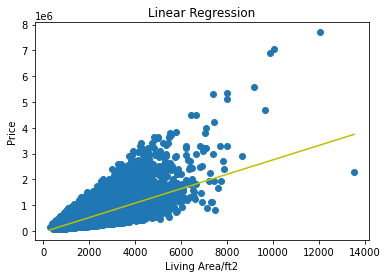

In [14]:
plt.scatter(x_linear_regression, y)
plt.title("Linear Regression")
plt.ylabel("Price")
plt.xlabel("Living Area/ft2")
plt.plot(x_linear_regression,model.predict(x_linear_regression),color="y")
plt.show()

In [15]:
model_multi=LinearRegression()   #build linear regression model
model_multi.fit(x_multilinear_regression_training,y_training)  #fitting the training data
predicted_multi=model_multi.predict(x_multilinear_regression_testing) #testing our model’s performance


print("MSE", mean_squared_error(y_testing,predicted_multi))
print("R squared", metrics.r2_score(y_testing,predicted_multi))

MSE 68993350911.74413
R squared 0.5436244783884367


The Multi-linear model is able to improve performance slightly, however since it is still unable to predict non-linear relationships between features, there is still room for improvement.

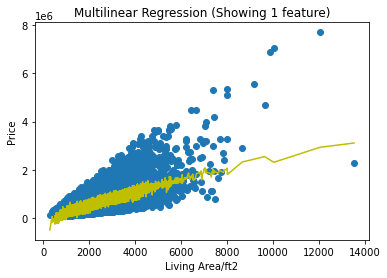

In [16]:
plt.scatter(x_linear_regression, y)
plt.title("Multilinear Regression (Showing 1 feature)")
plt.ylabel("Price")
plt.xlabel("Living Area/ft2")
plt.plot(x_linear_regression,model_multi.predict(x_multilinear_regression),color="y")
plt.show()

In [17]:
model_poly=LinearRegression()   #build polynomial multi regression model
model_poly.fit(x_polynomial_multi_training,y_training)  #fitting the training data
predicted_poly=model_poly.predict(x_polynomial_multi_testing) #testing our model’s performance


print("MSE", mean_squared_error(y_testing,predicted_poly))
print("R squared", metrics.r2_score(y_testing,predicted_poly))

MSE 53682444343.6808
R squared 0.6449026867810717


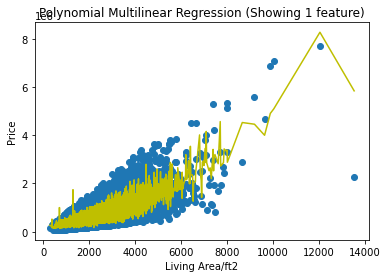

In [18]:
plt.scatter(x_linear_regression, y)
plt.title("Polynomial Multilinear Regression (Showing 1 feature)")
plt.ylabel("Price")
plt.xlabel("Living Area/ft2")
plt.plot(x_linear_regression,model_poly.predict(x_polynomial),color="y")
plt.show()